In [9]:
!nvidia-smi

Mon Feb 26 14:32:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.12                 Driver Version: 546.12       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| 57%   60C    P8               9W / 125W |   4794MiB /  6144MiB |     11%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
import os
from IPython import display
from IPython.display import Image
import ultralytics
from ultralytics import YOLO
import sklearn.metrics as metrics
import matplotlib as plt
import numpy as np
import cv2
from IPython.display import clear_output
import torch
from IPython import display
import math
import cvzone
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import gc

In [11]:
print(torch.version.cuda)
print(torch.cuda.is_available())

12.1
True


In [12]:
HOME = os.getcwd()
print(HOME)

c:\Users\Student Robotic\Desktop\ruben\Programming\FRC\NeuralNet\2024\GoogleColab


In [13]:
model = YOLO("C:/Users/Student Robotic/Desktop/ruben/Programming/FRC/NeuralNet/2024/GoogleColab/runs/detect/train78/weights/best.pt")
#model = YOLO("yolov8s.pt")

In [14]:
%pip install ultralytics==8.0.0196
display.clear_output()
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
Setup complete  (16 CPUs, 15.8 GB RAM, 291.6/475.7 GB disk)


In [15]:
gc.collect()

1333

In [16]:
model.train(data="C:/Users/Student Robotic/Desktop/ruben/Programming/FRC/NeuralNet/2024/GoogleColab/FRC2024/data.yaml", 
            epochs=100, imgsz=416, plots=True, save_period=2, cache=True, fraction=1, amp=False, dropout=0.5, weight_decay=0.25, 
            augment=False, optimizer='AdamW', momentum=0.5)

New https://pypi.org/project/ultralytics/8.1.18 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: task=detect, mode=train, model=C:/Users/Student Robotic/Desktop/ruben/Programming/FRC/NeuralNet/2024/GoogleColab/runs/detect/train78/weights/best.pt, data=C:/Users/Student Robotic/Desktop/ruben/Programming/FRC/NeuralNet/2024/GoogleColab/FRC2024/data.yaml, epochs=100, patience=50, batch=16, imgsz=416, save=True, save_period=2, cache=True, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, 

GUYS ITS WORKING!!! (this is outdated)

In [ ]:
#15 epochs for small model with full set
#15 epochs for large model with full set


#Most recent model: number 73
#Best model so far: 

In [ ]:
path = 'C:/Users/Student Robotic/Desktop/ruben/Programming/FRC/NeuralNet/2024/GoogleColab/runs/detect/train128/'

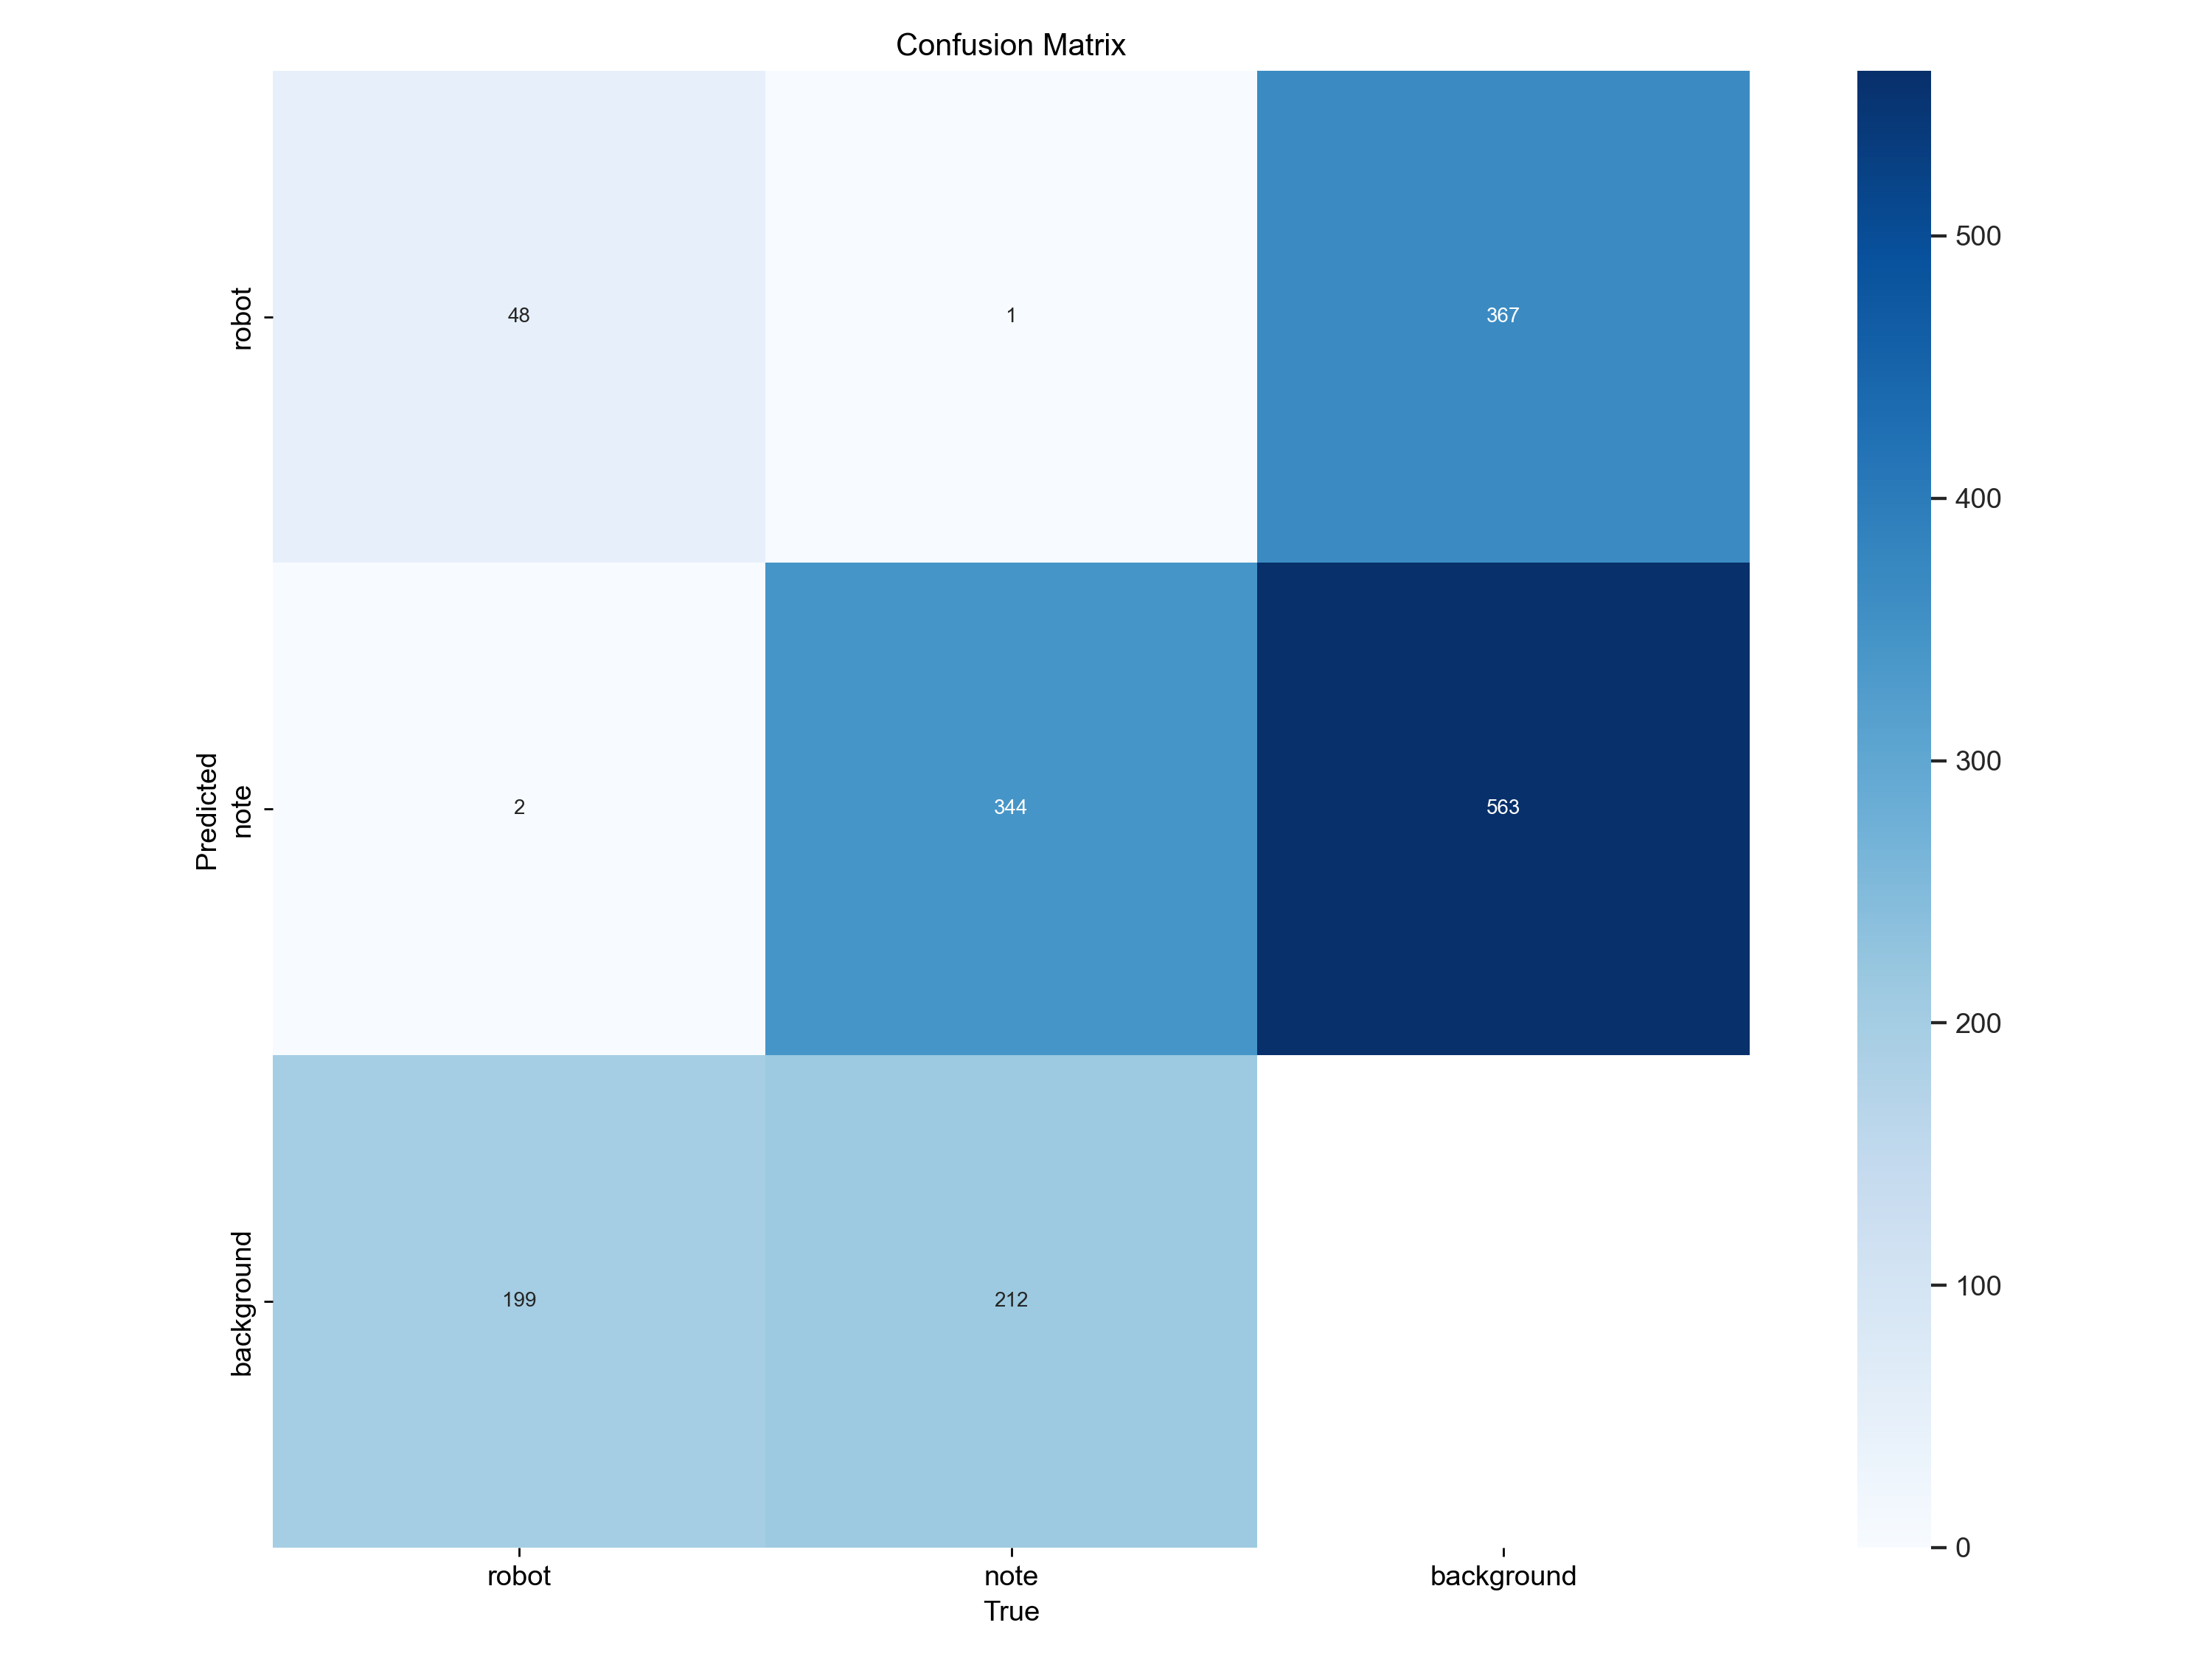

In [ ]:
Image(filename= path+'confusion_matrix.png', width=2100)

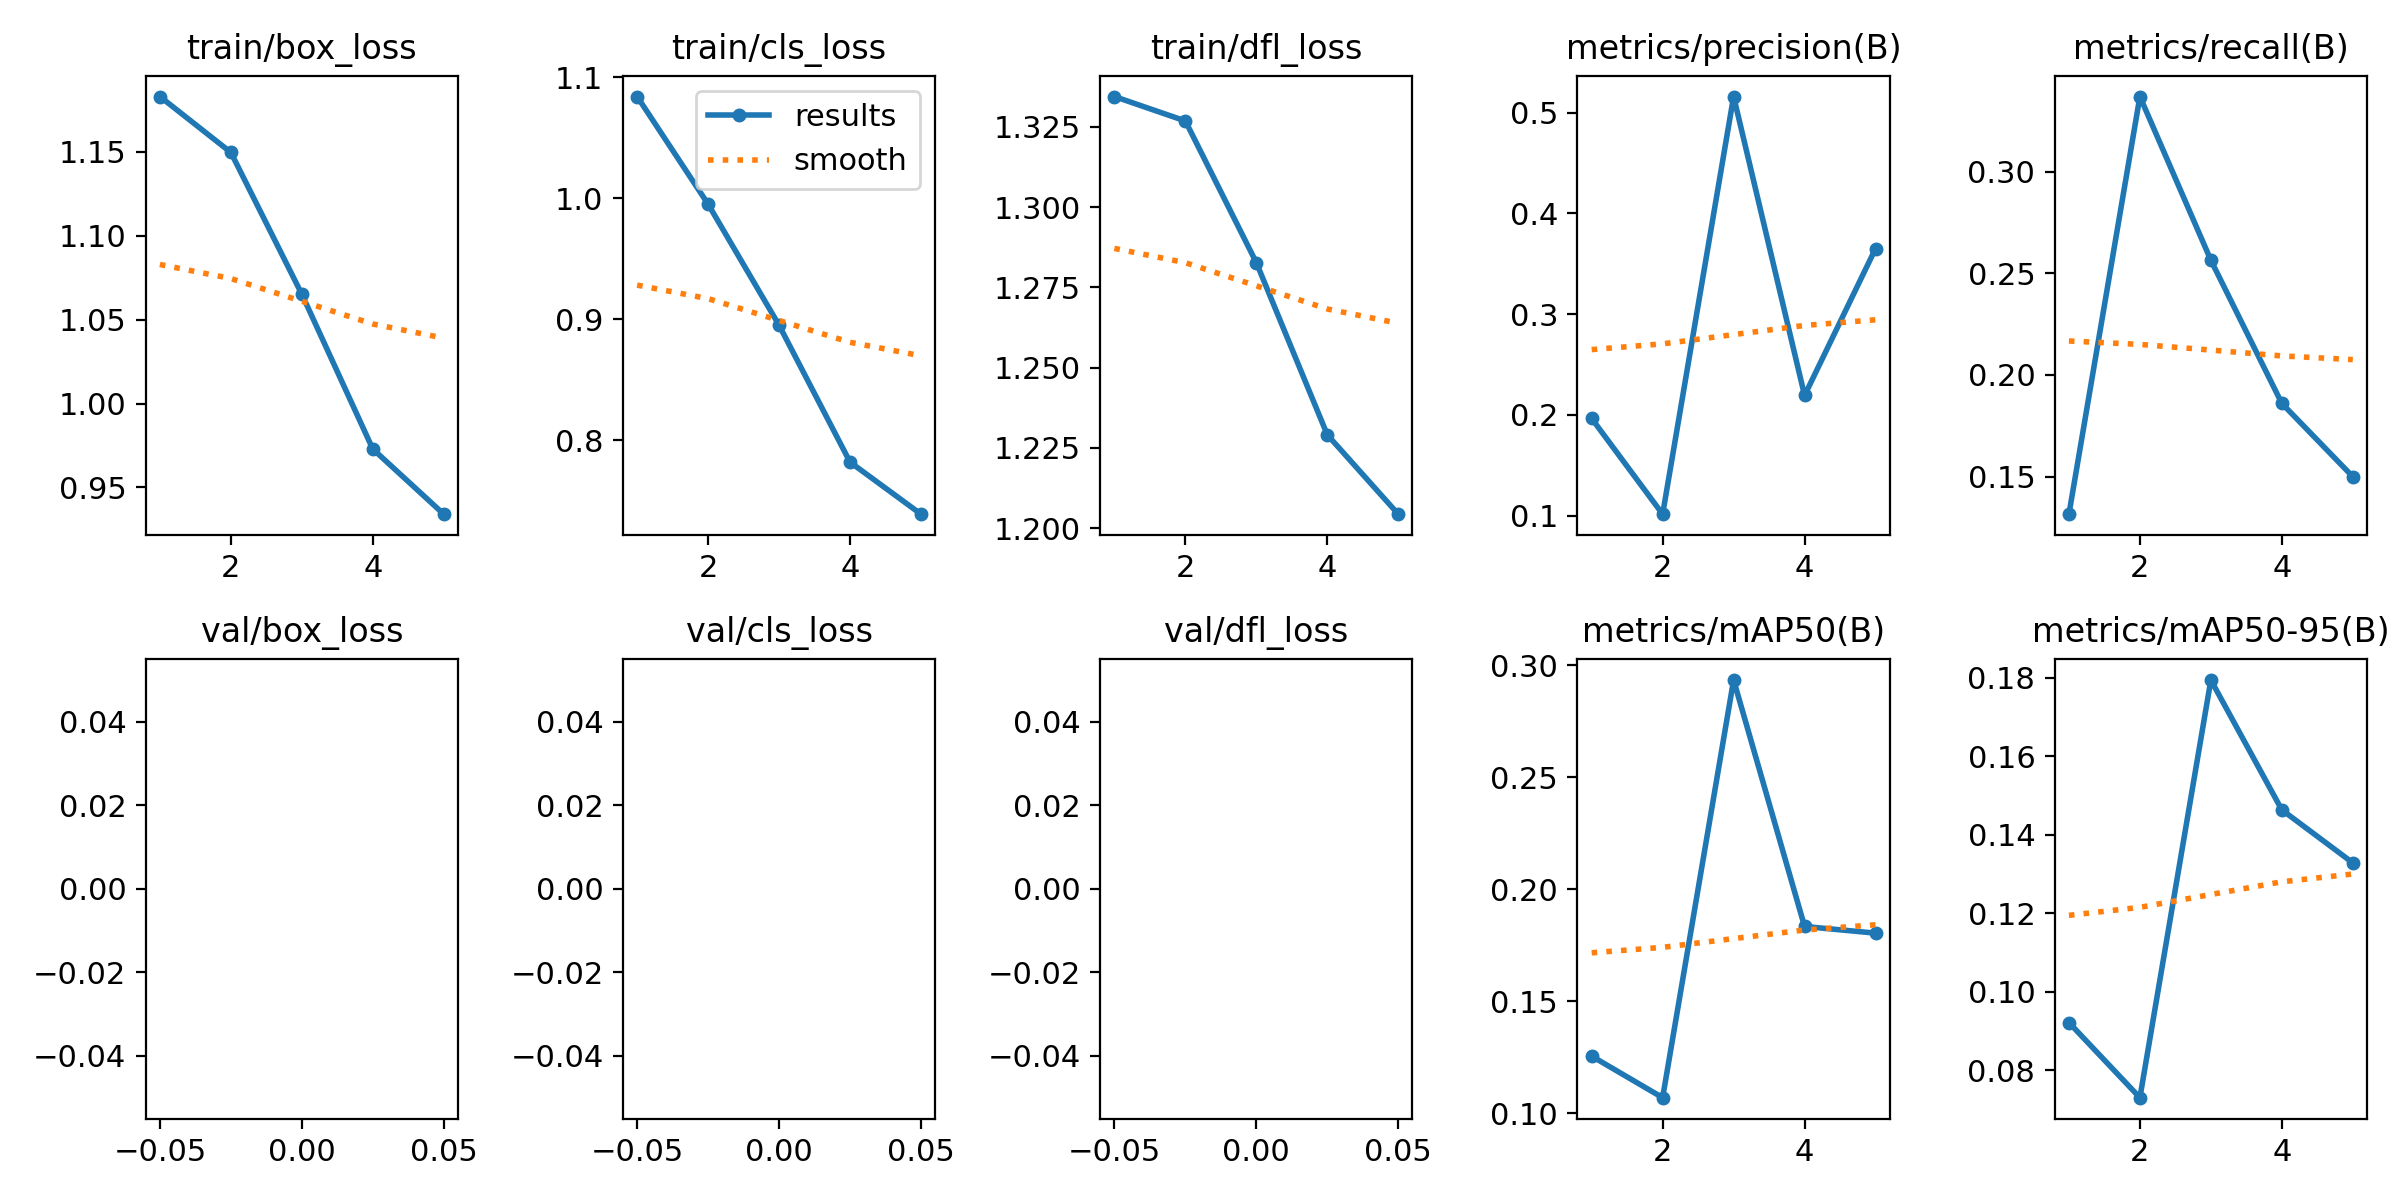

In [ ]:
Image(filename=path+'results.png', width=2100)

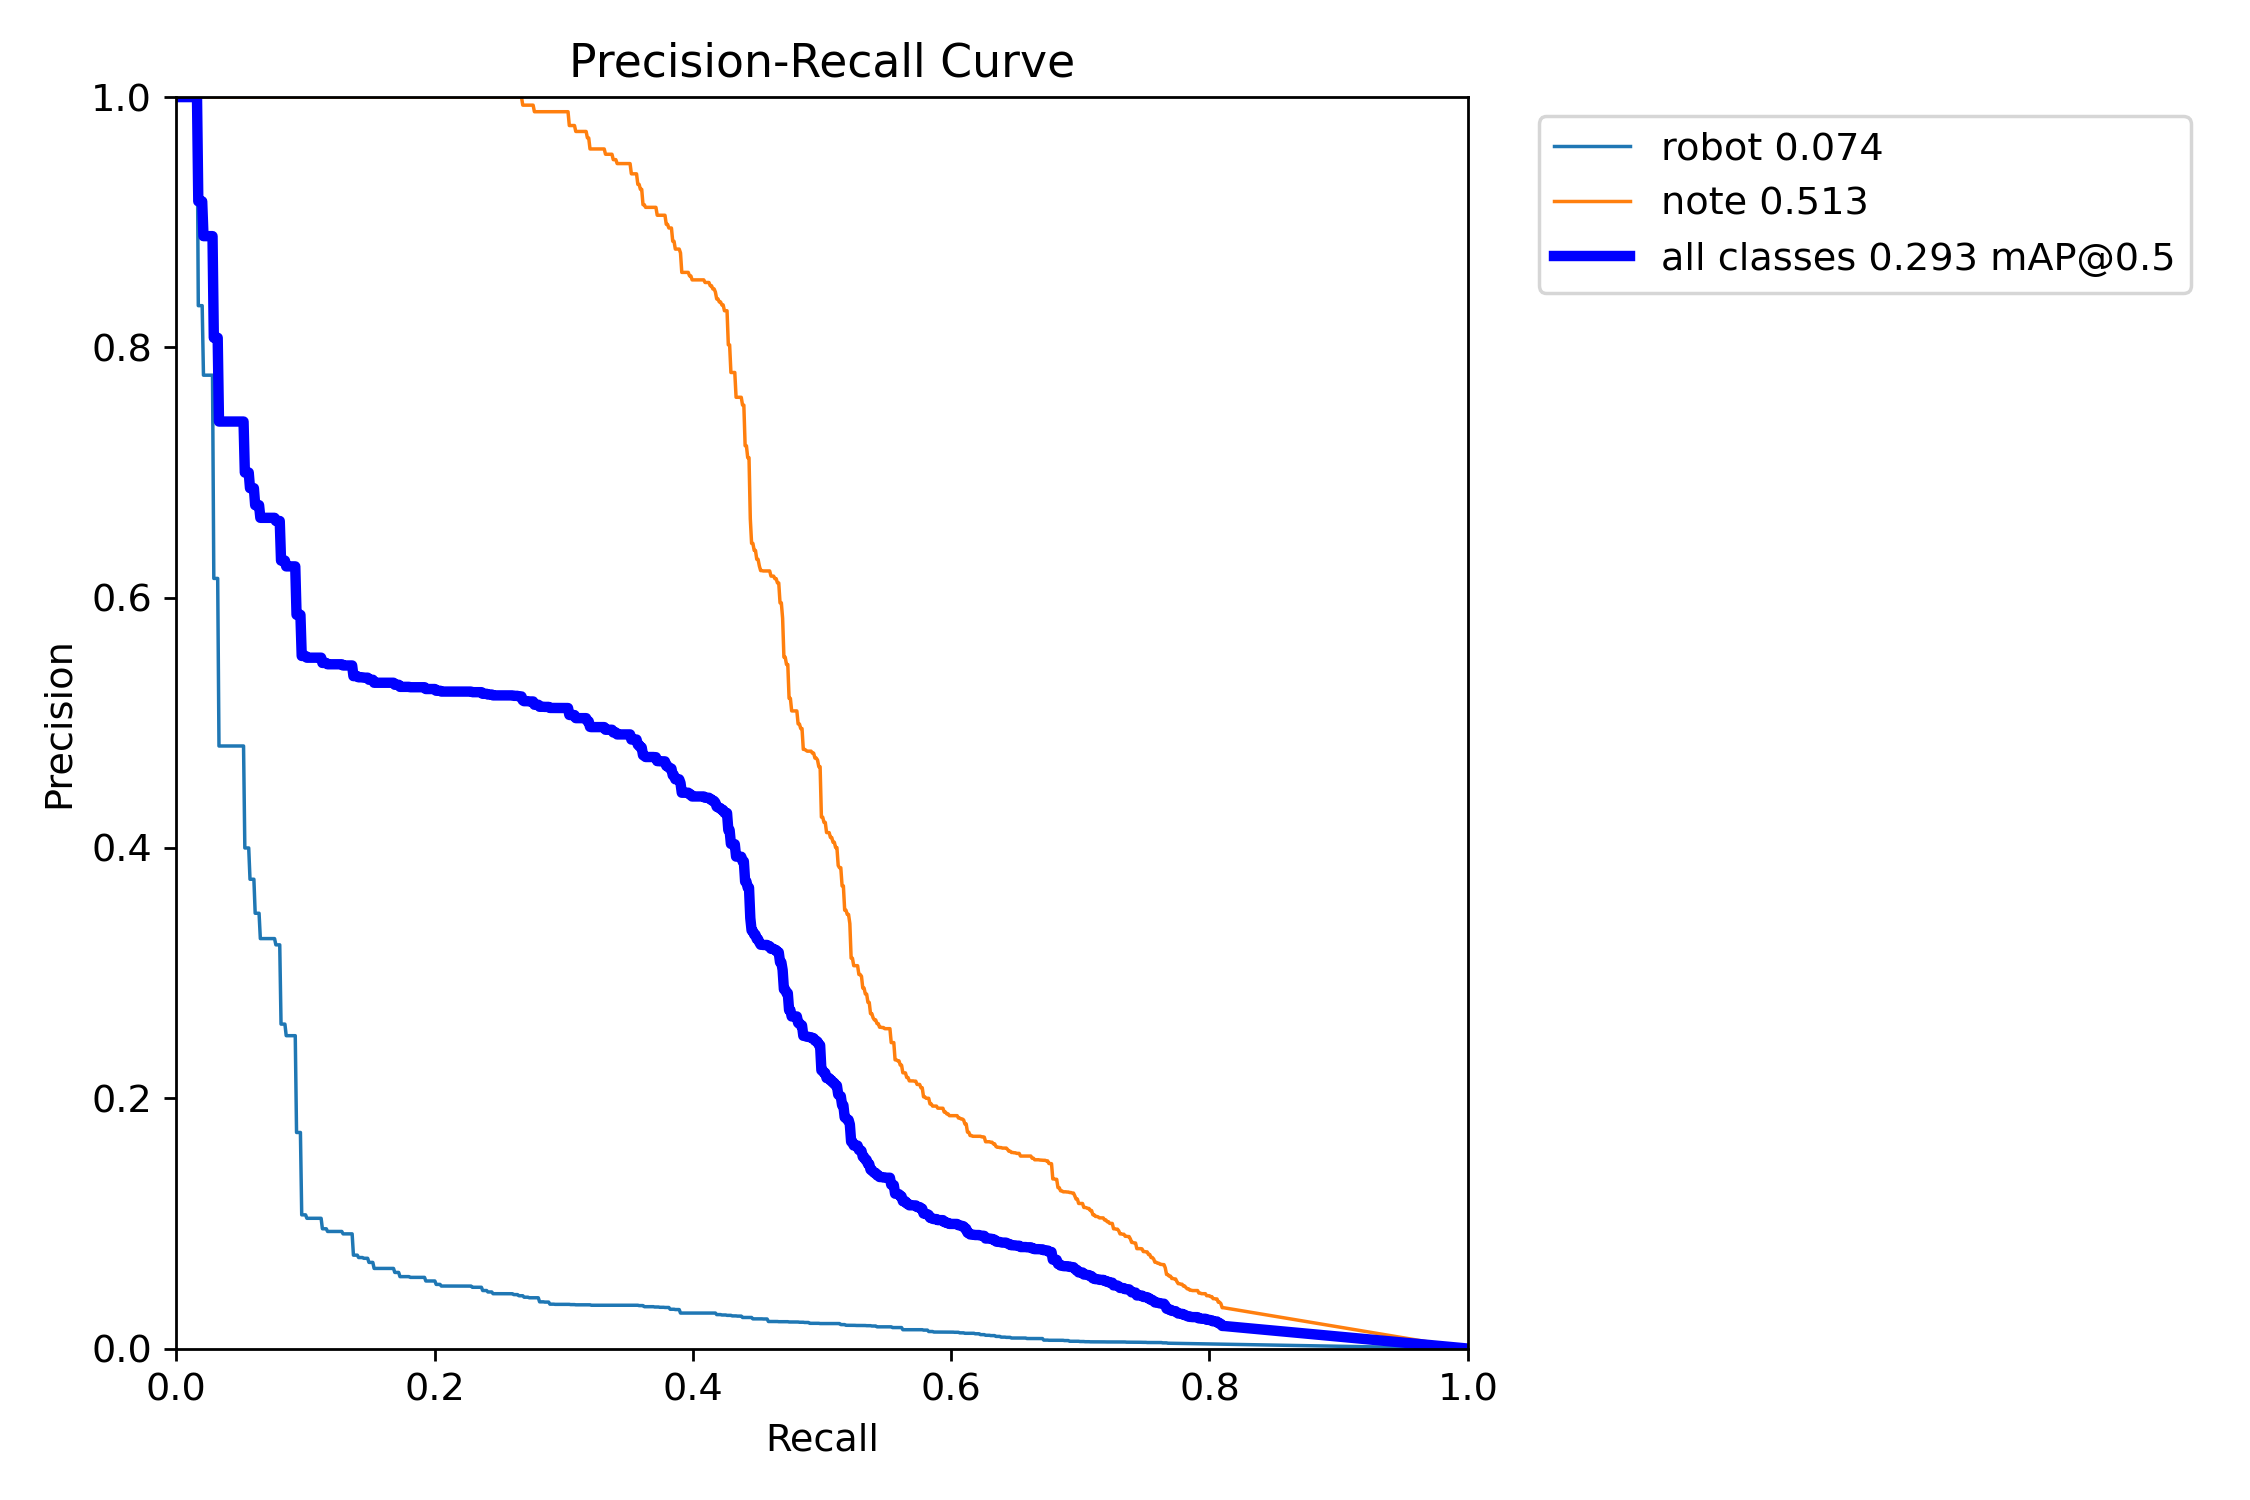

In [ ]:
Image(filename= path+'PR_curve.png', width=2100)

In [ ]:

Image(filename= path+'val_batch0_pred.jpg', width=600)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Student Robotic/Desktop/ruben/Programming/FRC/NeuralNet/2024/GoogleColab/runs/detect/train124/val_batch0_pred.jpg'

KeyboardInterrupt: 

In [ ]:
Image(filename= path+'PR_curve.png', width=2100)

In [ ]:
'''#Code for testing it on camera's (still have to check if its correct

cap = cv2.VideaoCapture(0)
try:
    while cap.isOpened():
        #get frame of image
        ret, frame = cap.read()
        if not ret:
            print("Error trying to capture image frame")
        #put into model
        results = model(frame)
        #get bounding box coordinates
        boxes = results.xyxy[00].cpu().numpy()
        for box in boxes:
            x1, y1, x2, y2, _ = box
            print("Bounding box: ({x1}, {y1}) - ({x2}, {y2})")
        #display frame
        cv2.imshow("Webcam", frame)

        if (cv2.waitKey(1) & 0xFF == ord('q')):
            break
finally:
    cap.release()
    cv2.destroyAllWindows()'''

'#Code for testing it on camera\'s (still have to check if its correct\n\ncap = cv2.VideaoCapture(0)\ntry:\n    while cap.isOpened():\n        #get frame of image\n        ret, frame = cap.read()\n        if not ret:\n            print("Error trying to capture image frame")\n        #put into model\n        results = model(frame)\n        #get bounding box coordinates\n        boxes = results.xyxy[00].cpu().numpy()\n        for box in boxes:\n            x1, y1, x2, y2, _ = box\n            print("Bounding box: ({x1}, {y1}) - ({x2}, {y2})")\n        #display frame\n        cv2.imshow("Webcam", frame)\n\n        if (cv2.waitKey(1) & 0xFF == ord(\'q\')):\n            break\nfinally:\n    cap.release()\n    cv2.destroyAllWindows()'